## Tensorflow Learn

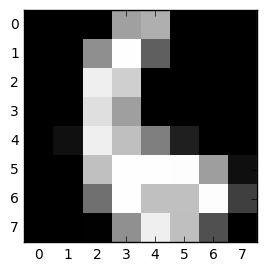

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
fig = plt.figure(figsize=(3,3))

plt.imshow(digits['images'][66], cmap='gray', interpolation='none')
plt.show()

In [16]:
from sklearn import svm

classifier = svm.SVC(gamma=0.001)
classifier.fit(digits.data, digits.target)
predicted = classifier.predict(digits.data)

In [17]:
import numpy as np

print(np.mean(digits.target == predicted))

0.998887033945


In [19]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [21]:
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

print(np.mean(y_test == predicted))

0.991111111111


## Tensorflow Leran

In [38]:
import tensorflow as tf
from tensorflow.contrib import learn
n_classes = len(set(y_train))
feature_columns = learn.infer_real_valued_columns_from_input(X_train)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=n_classes)
classifier.fit(X_train, y_train, steps=100)

y_pred = list(classifier.predict(X_test))
print(np.mean(y_test == y_pred))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, '_task_type': None, '_task_id': 0, '_master': '', 'tf_random_seed': None, '_evaluation_master': '', 'save_summary_steps': 100, 'save_checkpoints_secs': 600, 'keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001835C7BD390>, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, 'save_checkpoints_steps': None, '_environment': 'local', '_num_ps_replicas': 0}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.91      0.93      0.92        46
          2       1.00      1.00      1.00        44
          3       0.98      0.94      0.96        48
          4       0.95      1.00      0.98        42
          5       0.95      0.97      0.96        40
          6       1.00      0.98      0.99        47
          7       1.00      0.97      0.99        37
          8       0.90      0.88      0.89        42
          9       0.96      0.98      0.97        53

avg / total       0.97      0.97      0.97       450

